In [1]:
import moviepy.editor as mpe

from sklearn import decomposition

from IPython.display import display

In [2]:
import numpy as np
from PIL import Image
import scipy
from scipy import linalg
from sklearn import decomposition
from skimage.transform import resize

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

In [4]:
TOL = 1.0e-8

In [17]:
video = mpe.VideoFileClip("video.mp4")

In [18]:
duration=int(video.duration)
duration

50

In [19]:
video.subclip(0,50).ipython_display(width=300)

Moviepy - Building video __temp__.mp4.
Moviepy - Writing video __temp__.mp4



Moviepy - Done !
Moviepy - video ready __temp__.mp4


### Вспомогательные функции

In [20]:
def create_data_matrix_from_video(clip, k=5, scale=25):
    #return np.vstack([scipy.misc.imresize(rgb2gray(clip.get_frame(i/float(k))).astype(int), 
     #                 scale).flatten() for i in range(k * int(clip.duration))]).T
    ns = (120,160) 
    return np.vstack([resize(rgb2gray(clip.get_frame(i/float(k))).astype(int), 
                      ns).flatten() for i in range(k * int(clip.duration))]).T
    #return np.vstack([np.array((rgb2gray(clip.get_frame(i/float(k))).astype(int).resize(ns))).flatten() for i in range(k * int(clip.duration))]).T

In [21]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])

In [22]:
def plt_images(M, A, E, index_array, dims, filename=None):
    f = plt.figure(figsize=(15, 10))
    r = len(index_array)
    pics = r * 3
    for k, i in enumerate(index_array):
        for j, mat in enumerate([M, A, E]):
            sp = f.add_subplot(r, 3, 3*k + j + 1)
            sp.axis('Off')
            pixels = mat[:,i]
            if isinstance(pixels, scipy.sparse.csr_matrix):
                pixels = pixels.todense()
            plt.imshow(np.reshape(pixels, dims), cmap='gray')
    return f

In [23]:
def plots(ims, dims, figsize=(15,20), rows=1, interp=False, titles=None):
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims)
    f = plt.figure(figsize=figsize)
    for i in range(len(ims)):
        sp = f.add_subplot(rows, len(ims)//rows, i+1)
        sp.axis('Off')
        plt.imshow(np.reshape(ims[i], dims), cmap="gray")

### Загрузка данных

In [24]:
scale = 50   # Adjust scale to change resolution of image
dims = (int(240 * (scale/100)), int(320 * (scale/100)))

In [25]:
M = create_data_matrix_from_video(video, 100, scale)
# M = np.load("low_res_surveillance_matrix.npy")

In [26]:
print(dims, M.shape)

(120, 160) (19200, 5000)


In [27]:
np.save("low_res_surveillance_matrix.npy", M)

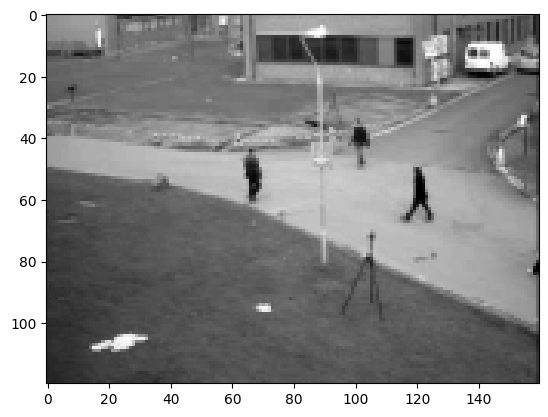

In [28]:
plt.imshow(np.reshape(M[:,140], dims), cmap='gray');

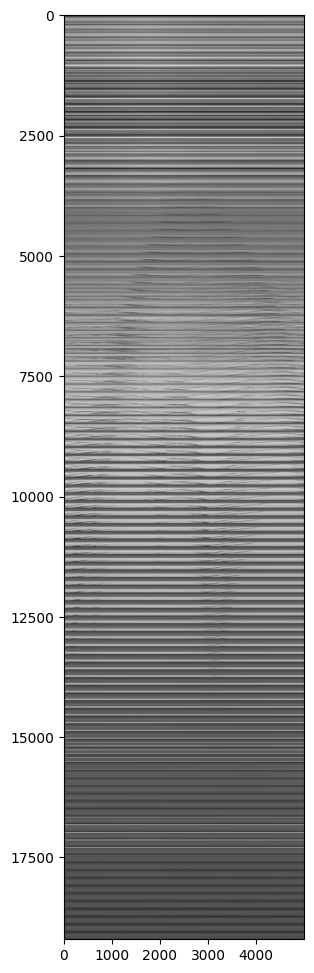

In [29]:
plt.figure(figsize=(12, 12))
plt.imshow(M, cmap='gray')

In [20]:
plt.imsave(fname="image1.jpg", arr=np.reshape(M[:,140], dims), cmap='gray')

### Video

In [30]:
u, s, v = decomposition.randomized_svd(M, 2)

In [31]:
u.shape, s.shape, v.shape

((19200, 2), (2,), (2, 5000))

In [32]:
low_rank = u @ np.diag(s) @ v
low_rank.shape

(19200, 5000)

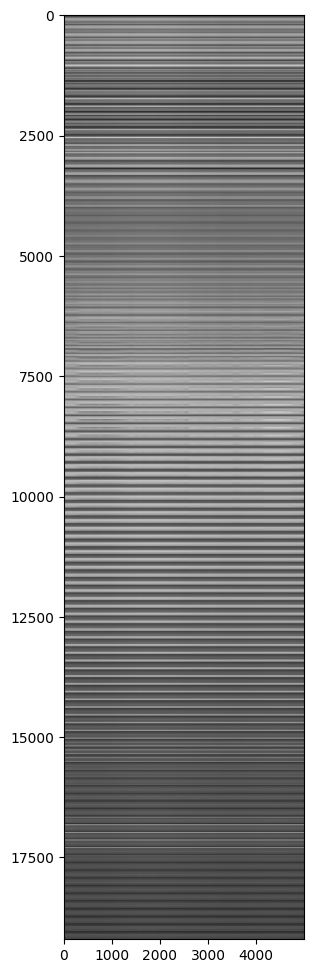

In [33]:
plt.figure(figsize=(12, 12))
plt.imshow(low_rank, cmap='gray')

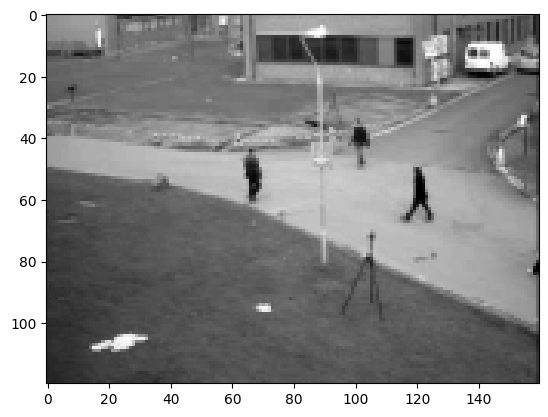

In [34]:
plt.imshow(np.reshape(M[:,140], dims), cmap='gray');

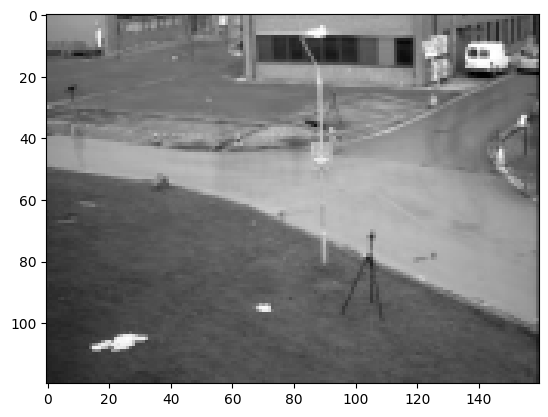

In [35]:
plt.imshow(np.reshape(low_rank[:,140], dims), cmap='gray');

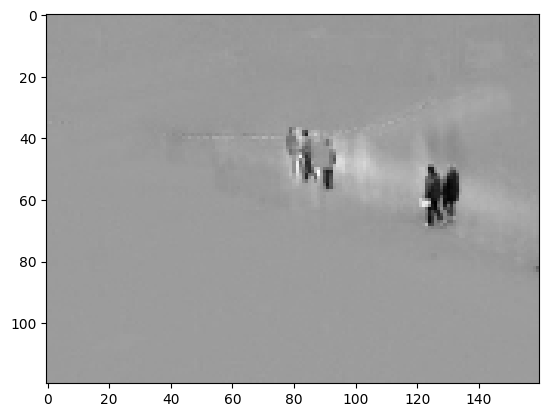

In [36]:
plt.imshow(np.reshape(M[:,550] - low_rank[:,550], dims), cmap='gray');

In [37]:
img = np.reshape(low_rank[:,550],dims)

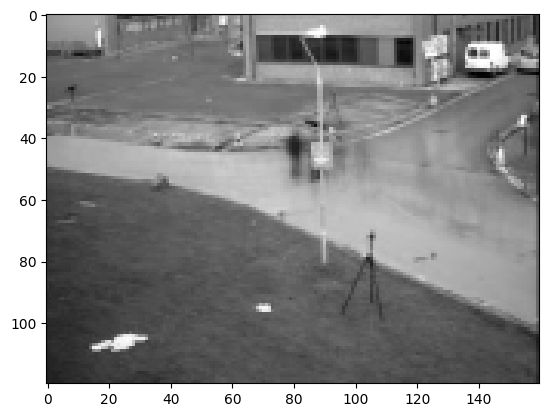

In [38]:
plt.imshow(img,cmap='gray')

In [39]:
low_rank.shape

(19200, 5000)

In [40]:
dims

(120, 160)

In [41]:
import cv2
import os
 
width = dims[1]
height = dims[0]


fps = low_rank.shape[1]/duration
out = cv2.VideoWriter('output.mp4', cv2.VideoWriter_fourcc(*'mp4v'), fps, (width, height), 0)
for i in range(low_rank.shape[1]):
    arr = np.reshape(M[:,i] - low_rank[:,i], dims)
    data = ((arr - arr.min()) * (1/(arr.max() - arr.min()) * 255)).astype('uint8')
    out.write(data)
out.release()

In [42]:
video2 = mpe.VideoFileClip("output.mp4")
video2.subclip(0,50).ipython_display(width=300)

Moviepy - Building video __temp__.mp4.
Moviepy - Writing video __temp__.mp4



Moviepy - Done !
Moviepy - video ready __temp__.mp4


### Rank 1

In [36]:
u, s, v = decomposition.randomized_svd(M, 1)

In [37]:
lowest_rank = u @ np.diag(s) @ v

In [ ]:
plt.figure(figsize=(12, 12))
plt.imshow(lowest_rank, cmap='gray')

In [ ]:
plt.imshow(np.reshape(M[:,550] - lowest_rank[:,550], dims), cmap='gray');

In [ ]:
plt.imshow(np.reshape(M[:,140] - low_rank[:,140], dims), cmap='gray');

In [ ]:
plt.imshow(np.reshape(low_rank[:,140], dims), cmap='gray');